 #Task 1:
This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
Column description:
1. Gender: Gender of the student (male/female)
2. EthnicGroup: Ethnic group of the student (group A to E)
3. ParentEduc: Parent(s) education background (from some_highschool to master's degree)
4. LunchType: School lunch type (standard or free/reduced)
5. TestPrep: Test preparation course followed (completed or none)
6. ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
7. PracticeSport: How often the student parctice sport (never/sometimes/regularly))
8. IsFirstChild: If the child is first child in the family or not (yes/no)
9. NrSiblings: Number of siblings the student has (0 to 7)
10. TransportMeans: Means of transport to school (schoolbus/private)
11. WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
12. MathScore: math test score(0-100)
13. ReadingScore: reading test score(0-100)
14. WritingScore: writing test score(0-100)

In [197]:
!gdown 1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2

Downloading...
From: https://drive.google.com/uc?id=1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2
To: /content/Expanded_data_with_more_features.csv
100% 2.91M/2.91M [00:00<00:00, 195MB/s]


In [198]:
import pandas as pd

In [199]:
data = pd.read_csv('/content/Expanded_data_with_more_features.csv')
data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [201]:
data = data.drop(columns=['Unnamed: 0'], axis=1)

In [202]:
data.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [203]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [204]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
data['EthnicGroup'].value_counts()

group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: EthnicGroup, dtype: int64

In [206]:
def encode_education(x):
  if type(x) == float:
    return x
  if "some high school" == x:
    return 0
  if "high school" == x:
    return 1
  if "some college" == x:
    return 2
  if "college" in x:
    return 3
  if "associate" in x:
    return 4
  if "bachelor" in x:
    return 5
  if "master" in x:
    return 6

In [207]:
data['ParentEduc'].value_counts()

some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64

In [208]:
data['ParentEduc'] = data['ParentEduc'].apply(encode_education)

In [209]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

In [210]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,NaN,5.0,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,0,group C,2.0,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,0,group B,6.0,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,1,group A,4.0,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,1,group C,2.0,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [211]:
data['TransportMeans'].value_counts()

school_bus    16145
private       11362
Name: TransportMeans, dtype: int64

In [212]:
def encode_lunch(x):
  if type(x) == float:
    return x
  if "standard" == x:
    return 1
  return 0

def encode_test_prep(x):
  if type(x) == float:
    return x
  if "completed" == x:
    return 1
  return 0

def encode_sport(x):
  if type(x) == float:
    return x
  if "regularly" == x:
    return 2
  if "sometimes" == x:
    return 1
  return 0

def encode_first_child(x):
  if type(x) == float:
    return x
  if "yes" == x:
    return 1
  return 0

def encode_transport(x):
  if type(x) == float:
    return x
  if "private" == x:
    return 1
  return 0

In [213]:
data['LunchType'] = data['LunchType'].apply(encode_lunch)
data['TestPrep'] = data['TestPrep'].apply(encode_test_prep)
data['PracticeSport'] = data['PracticeSport'].apply(encode_sport)
data['IsFirstChild'] = data['IsFirstChild'].apply(encode_first_child)
data['TransportMeans'] = data['TransportMeans'].apply(encode_transport)

In [214]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,NaN,5.0,1,0.0,married,2.0,1.0,3.0,0.0,< 5,71,71,74
1,0,group C,2.0,1,NaN,married,1.0,1.0,0.0,NaN,5 - 10,69,90,88
2,0,group B,6.0,1,0.0,single,1.0,1.0,4.0,0.0,< 5,87,93,91
3,1,group A,4.0,0,0.0,married,0.0,0.0,1.0,NaN,5 - 10,45,56,42
4,1,group C,2.0,1,0.0,married,1.0,1.0,0.0,0.0,5 - 10,76,78,75


In [215]:
data = pd.concat([data, pd.get_dummies(data['ParentMaritalStatus'])], axis=1)

In [216]:
data = data.drop(columns=['ParentMaritalStatus'], axis=1)

In [217]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,divorced,married,single,widowed
0,0,NaN,5.0,1,0.0,2.0,1.0,3.0,0.0,< 5,71,71,74,0,1,0,0
1,0,group C,2.0,1,NaN,1.0,1.0,0.0,NaN,5 - 10,69,90,88,0,1,0,0
2,0,group B,6.0,1,0.0,1.0,1.0,4.0,0.0,< 5,87,93,91,0,0,1,0
3,1,group A,4.0,0,0.0,0.0,0.0,1.0,NaN,5 - 10,45,56,42,0,1,0,0
4,1,group C,2.0,1,0.0,1.0,1.0,0.0,0.0,5 - 10,76,78,75,0,1,0,0


In [218]:
def encode_hours(x):
  if type(x) == float:
    return x
  if x == '< 5':
    return 0
  if x == "5 - 10":
    return 1
  return 2

In [219]:
data['WklyStudyHours'] = data['WklyStudyHours'].apply(encode_hours)

In [220]:
data = data.dropna(subset=['EthnicGroup'], axis=0)

In [221]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,divorced,married,single,widowed
1,0,group C,2.0,1,NaN,1.0,1.0,0.0,NaN,1.0,69,90,88,0,1,0,0
2,0,group B,6.0,1,0.0,1.0,1.0,4.0,0.0,0.0,87,93,91,0,0,1,0
3,1,group A,4.0,0,0.0,0.0,0.0,1.0,NaN,1.0,45,56,42,0,1,0,0
4,1,group C,2.0,1,0.0,1.0,1.0,0.0,0.0,1.0,76,78,75,0,1,0,0
5,0,group B,4.0,1,0.0,2.0,1.0,1.0,0.0,1.0,73,84,79,0,1,0,0


In [222]:
data['EthnicGroup'].value_counts()

group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: EthnicGroup, dtype: int64

In [223]:
data['EthnicGroup'] = encoder.fit_transform(data['EthnicGroup'])

In [224]:
data.isnull().sum()

Gender               0
EthnicGroup          0
ParentEduc        1731
LunchType            0
TestPrep          1706
PracticeSport      583
IsFirstChild       852
NrSiblings        1470
TransportMeans    2947
WklyStudyHours     886
MathScore            0
ReadingScore         0
WritingScore         0
divorced             0
married              0
single               0
widowed              0
dtype: int64

In [225]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,divorced,married,single,widowed
1,0,2,2.0,1,NaN,1.0,1.0,0.0,NaN,1.0,69,90,88,0,1,0,0
2,0,1,6.0,1,0.0,1.0,1.0,4.0,0.0,0.0,87,93,91,0,0,1,0
3,1,0,4.0,0,0.0,0.0,0.0,1.0,NaN,1.0,45,56,42,0,1,0,0
4,1,2,2.0,1,0.0,1.0,1.0,0.0,0.0,1.0,76,78,75,0,1,0,0
5,0,1,4.0,1,0.0,2.0,1.0,1.0,0.0,1.0,73,84,79,0,1,0,0


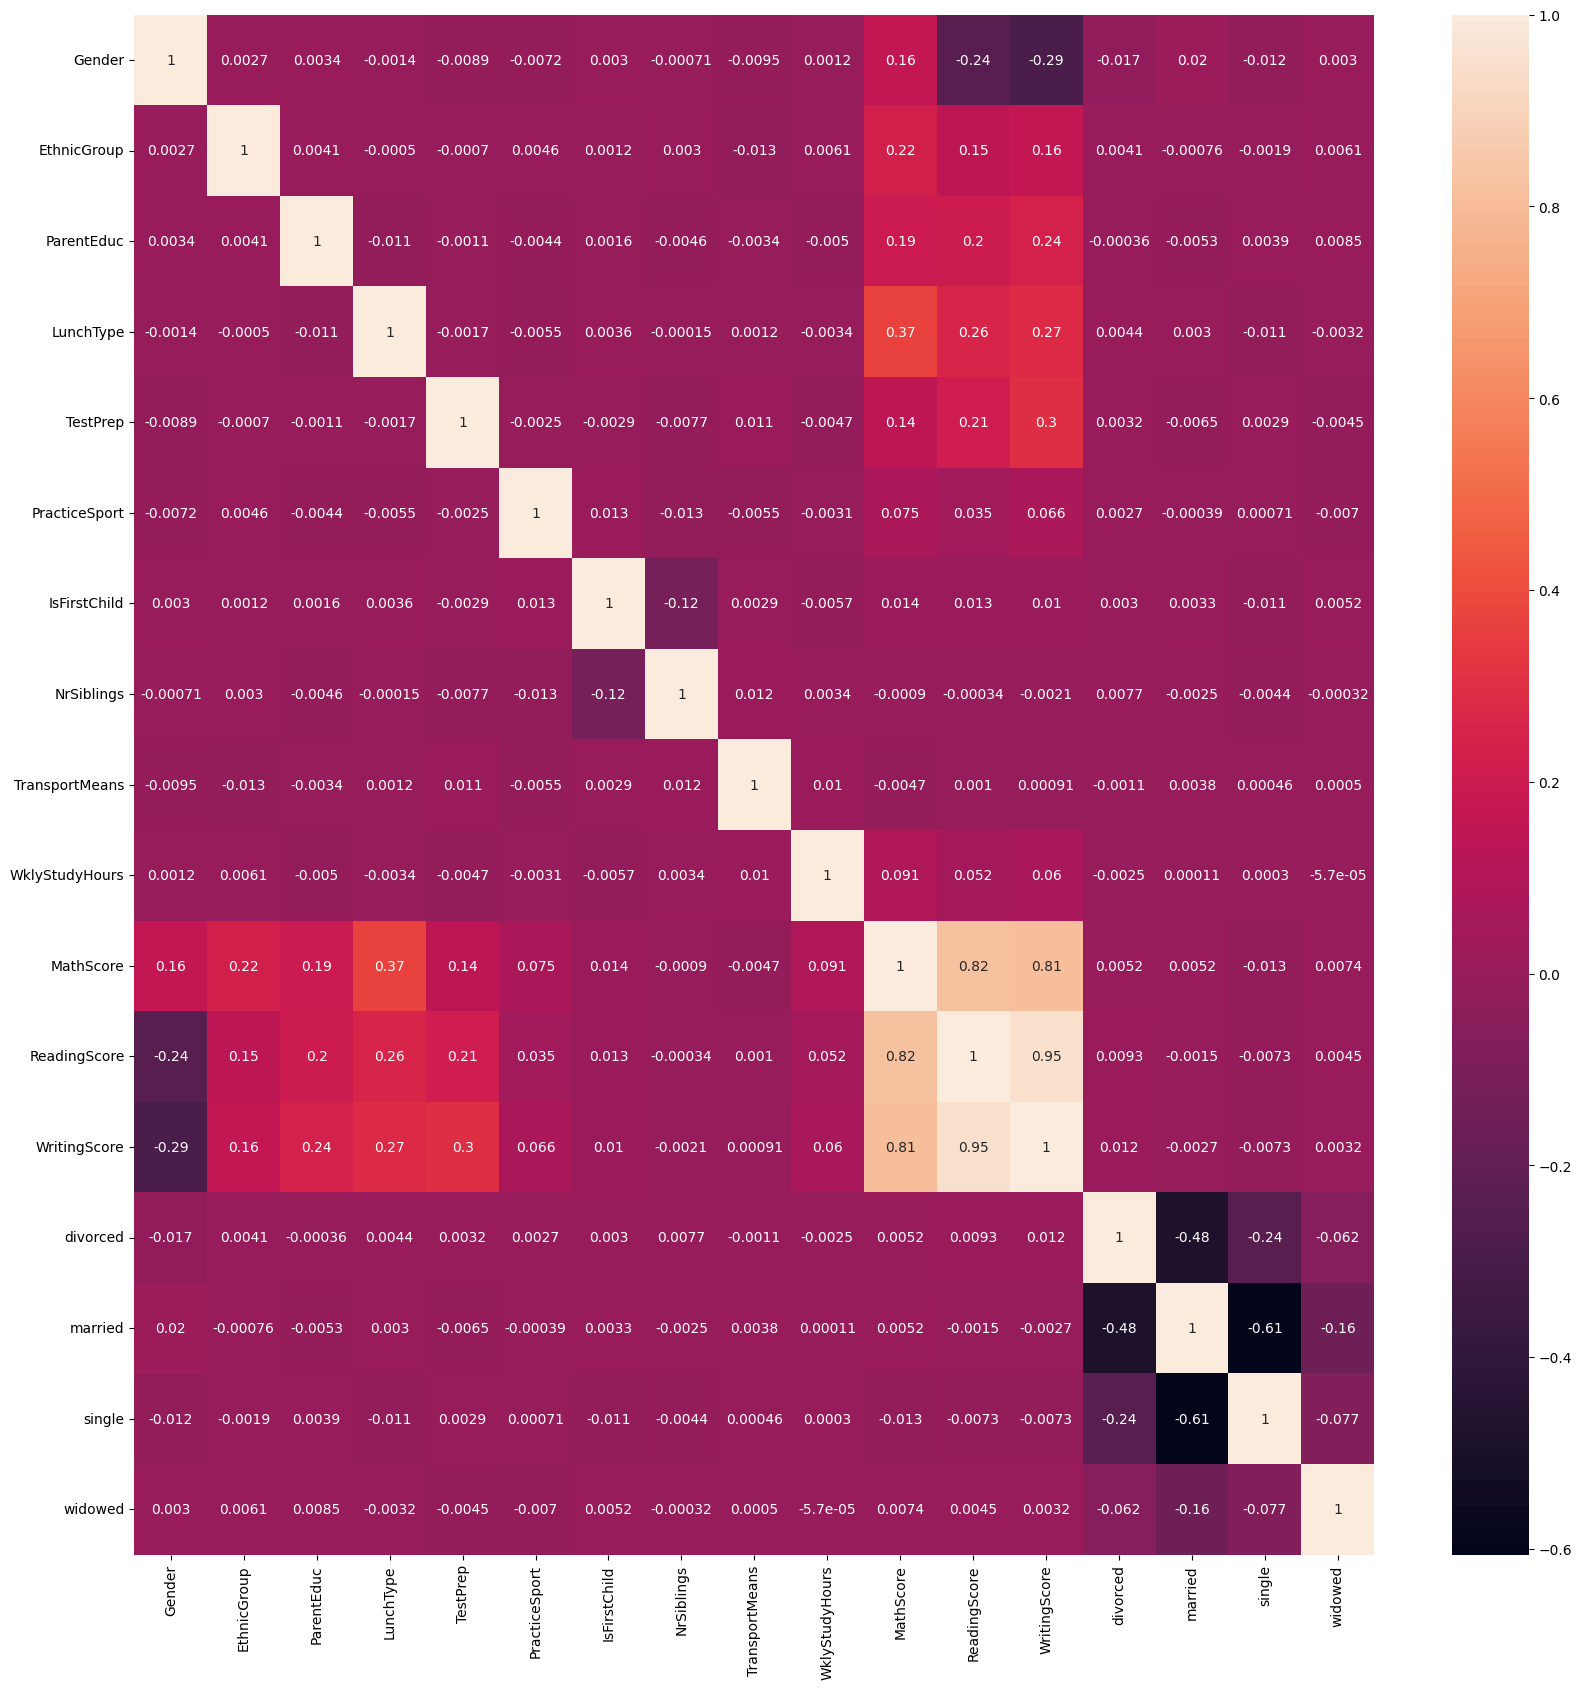

In [226]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [227]:
list(data.columns[2:12])

['ParentEduc',
 'LunchType',
 'TestPrep',
 'PracticeSport',
 'IsFirstChild',
 'NrSiblings',
 'TransportMeans',
 'WklyStudyHours',
 'MathScore',
 'ReadingScore']

In [228]:
features_to_fill = list(data.columns[2:12])

In [229]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
imputer = IterativeImputer()

In [231]:
data[features_to_fill] = imputer.fit_transform(data[features_to_fill])

In [232]:
data.isnull().sum()

Gender            0
EthnicGroup       0
ParentEduc        0
LunchType         0
TestPrep          0
PracticeSport     0
IsFirstChild      0
NrSiblings        0
TransportMeans    0
WklyStudyHours    0
MathScore         0
ReadingScore      0
WritingScore      0
divorced          0
married           0
single            0
widowed           0
dtype: int64

TRAIN THE MODEL

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X, Y = data[features_to_fill], data['WritingScore']

In [235]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

 #Model training (Use KNN, Logistic regression or Linear regression)

In [236]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report

In [237]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [238]:
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import numpy as np

In [240]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [241]:
preds = model.predict(X_test)

In [242]:
preds = scaler.inverse_transform(preds)

In [243]:
mean_absolute_error(Y_test, preds), mean_squared_error(Y_test, preds), r2_score(Y_test, preds)

(3.4640566573910494, 18.606756098436236, 0.9212244597722155)